###### 17.12.2017
### Solving weighted graph assignment problem with simulated annealing
#### Michał Sitko, Krzysztof Jankowski

In the report we will try to briefly present functionalities implemented in the assignment. The optimization algorithm  described in the introduction paper can be invoked using `simulated_annealing.execute` method.

The `graph` parameter is weighted bipartite graph structure. Since it is [networkx](https://networkx.github.io/) Graph class, assignments in [multiple formats](https://networkx.github.io/documentation/stable/reference/readwrite/index.html) supported by the library can be loaded and solved. Custom random bipartite graph generator was also implemented. For the purpose of this report only custom random generator will be used. Other interesting and useful data sources will be investigated in the further research.

The `paramters` parameter is a structure of simulated_annealing algorithm paramters:
- t_max - maximum temperature,
- t_min - minimum temperature,
- k_t - number of neighbour solutions checked in each iteration,
- type of a cooling scheme - one of Exponential, Logarithmic, Linear,
- i_s2_observation_interval - interval of generating observations (expressed in number of neighbour solution checked),
- i_s3_observation_interval - interval of generating observations (expressed in number of temperature updates).

Let's import simulated_annealing library and find what it can be used for!

In [1]:
from graph import *
from simulated_annealing import *

Let's generate small graph with 2 vertices in the left part and 3 vertices in the right part. Edge weights should be in range of [0, 10].

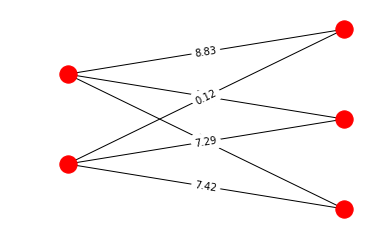

In [2]:
G = Graph.random_bipartite(2, 3, 0, 10)
Graph.draw_bipartite(G)

The following code solves the assgnment problem with the parameters:
- t_max = 100
- t_min = 0
- Linear Cooling Scheme
- k_t = 1

In [3]:
parameters = SimulatedAnnealingParameters(
    t_max=100,
    t_min=0,
    cooling_scheme=CoolingSchemeLinear(0.1),
    k_t=1,
    i_s2_observation_interval=1,
    i_s3_observation_interval=1
)

result = SimulatedAnnealing.execute(G, parameters)
print("Best total value %s found in %s iterations (%s time)."
      % (result.solution.get_estimate(), result.max_i_s2, result.total_time))

Best total value 3.38 found in 45 iterations (0.002857208251953125 time).


Let's draw a sample solution and algorithm learning curve.

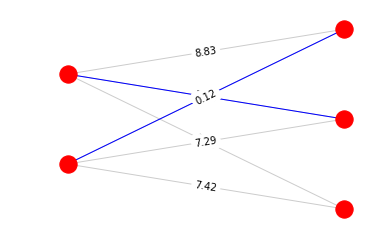

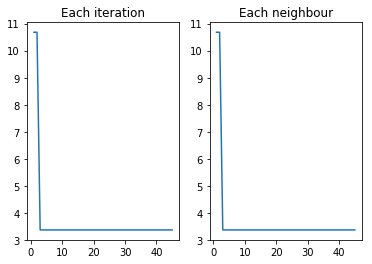

In [4]:
result.draw_solution()
result.draw_observations_plot()

Now let's genereate substantialy bigger graph 250x200 vertices and repeat the experiment using the same parameters. Since the graph is much bigger we will not draw the solution.

In [5]:
G = Graph.random_bipartite(250, 200, 0, 10)
result = SimulatedAnnealing.execute(G, parameters)
print("Best total value %s found in %s iterations (%s time)."
      % (result.solution.get_estimate(), result.max_i_s2, result.total_time))

Best total value 934.6300000000003 found in 45 iterations (0.0713338851928711 time).


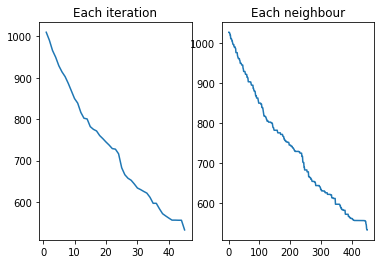

Best total value 532.96 found in 450 iterations (0.524604082107544 time).


In [6]:
parameters.k_t = 10

result = SimulatedAnnealing.execute(G, parameters)
result.draw_observations_plot()
print("Best total value %s found in %s iterations (%s time)."
      % (result.solution.get_estimate(), result.max_i_s2, result.total_time))

Not surprisingly we got much better results by increasing the the number of neighbours searched.
Let's test different cooling schemes.

In [7]:
parameters.cooling_scheme = CoolingSchemeExponential(0.6)

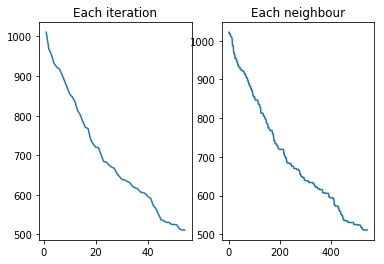

Best total value 511.5400000000001 found in 540 iterations (0.6762027740478516 time).


In [8]:
result = SimulatedAnnealing.execute(G, parameters)
result.draw_observations_plot()
print("Best total value %s found in %s iterations (%s time)."
      % (result.solution.get_estimate(), result.max_i_s2, result.total_time))

In [9]:
parameters.cooling_scheme = CoolingSchemeLogarithmic(1, 1)
parameters.T_min = 0.25

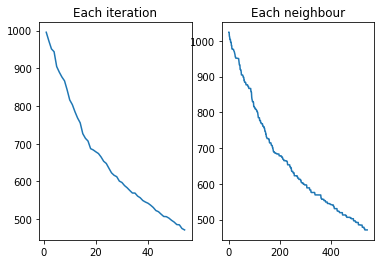

Best total value 471.2799999999998 found in 540 iterations (0.6139430999755859 time).


In [10]:
result = SimulatedAnnealing.execute(G, parameters)
result.draw_observations_plot()
print("Best total value %s found in %s iterations (%s time)."
      % (result.solution.get_estimate(), result.max_i_s2, result.total_time))

Linear, logarithmic, exponential cooling schemes does not seem to differ much in performance (assuming similar number of iterations) at the first look. However, in the future research, we will try to test them with different input data, different algorithm parametrizations.